# Tutorial ?. Flutter Analysis
## Part 1: Calculating flutter derivatives from forced-motion simulations/tests

### Description: The present notebook explains how the flutter derivatives (in Scanlan's notation) can be calculated from motion and force time series which were extracted from forced-motion simulations/tests.

#### Contents:
1. Theory review
2. Preparing the data
3. Fitting of the force time series
4. Calculation of the derivatives
5. Automatization

### 1. Theory review

#### 1.1. Scanlan's flutter derivatives

Scanlan and Tomko (1971) proposed the following expression to define the forces generated by the movement of a body inside a flow:

\begin{equation*}
L_{ae} = \frac{1}{2} \rho U^2 B \left[ K H^*_1 \frac{\dot{h}}{U} + K H^*_2 \frac{B\dot{\alpha}}{U} + K^2 H^*_3 \alpha + K^2 H^*_4 \frac{h}{B} \right]
\end{equation*}

\begin{equation*}
M_{ae} = \frac{1}{2} \rho U^2 B^2 \left[ K A^*_1 \frac{\dot{h}}{U} + K A^*_2 \frac{B\dot{\alpha}}{U} + K^2 A^*_3 \alpha + K^2 A^*_4 \frac{h}{B} \right]
\end{equation*}

where $L_{ae}$ and $M_{ae}$ are the lift and moment generated by aeroelastic forces, $h$ and $\alpha$ the vertical (heave) and rotational (pitch) motions, $\rho$ is the air density, $U$ the wind speed, $B$ the width of the object in the along-stream direction and $K$ is the non-dimensional frequency, defined as $K=B\omega/U$, where $\omega$ is the circular frequency of the motion. The non-dimensional coefficients $H^*_i$ and $A^*_i$ are the so-called flutter derivatives, which depend on the shape of the body and the reduced frequency $K$.

The previous expressions were later extended to cover a 3-degree-of-freedom case, including the horizontal displacement:

\begin{equation*}
L_{ae} = \frac{1}{2} \rho U^2 B \left[ K H^*_1 \frac{\dot{h}}{U} + K H^*_2 \frac{B\dot{\alpha}}{U} + K^2 H^*_3 \alpha + K^2 H^*_4 \frac{h}{B} + K H^*_5 \frac{\dot{p}}{U} + K H^*_6 \frac{p}{B} \right]
\end{equation*}

\begin{equation*}
M_{ae} = \frac{1}{2} \rho U^2 B^2 \left[ K A^*_1 \frac{\dot{h}}{U} + K A^*_2 \frac{B\dot{\alpha}}{U} + K^2 A^*_3 \alpha + K^2 A^*_4 \frac{h}{B} + K A^*_5 \frac{\dot{p}}{U} + K A^*_6 \frac{p}{B} \right]
\end{equation*}


\begin{equation*}
D_{ae} = \frac{1}{2} \rho U^2 B \left[ K P^*_1 \frac{\dot{p}}{U} + K P^*_2 \frac{B\dot{\alpha}}{U} + K^2 P^*_3 \alpha + K^2 P^*_4 \frac{p}{B} + K P^*_5 \frac{\dot{h}}{U} + K P^*_6 \frac{h}{B} \right]
\end{equation*}

where $D_{ae}$ is the drag generated by aeroelastic forces, $p$ is the horizontal (sway) motion and $P^*_i$ is a new set of aerodynamic derivatives.

However, in most of the cases this third degree of freedom can be neglected, only in very large bridges it is important. For a better understanding of the subject, the present exercise will deal with a 2-degree-of-freedom case. Nevertheless, some theoretical concepts will consider the horizontal movement for informative purposes.

#### 1.2. Calculation of the derivatives from forced motion simulations/tests

Usually, when carrying out forced motion tests, each degree of freedom is excited separately, so the above formulas can be simplyfied. For example, substituting $K$ for $B\omega/U$ and only considering heave motion, the lift formula is:

\begin{equation*}
L_{ae} = \frac{1}{2} \rho \omega^2 B^2 \left[ H^*_1 \frac{\dot{h}}{\omega} + H^*_4 h \right]
\end{equation*}

And when the imposed motion is sinusoidal:

\begin{equation*}
h = h_0 \sin{\left(\omega t\right)}
\end{equation*}

\begin{equation*}
\dot{h} = \omega h_0 \cos{\left(\omega t\right)}
\end{equation*}

\begin{equation*}
L_{ae} = \frac{1}{2} \rho \omega^2 B^2 \left[ H^*_1 h_0 \cos{\left(\omega t\right)} + H^*_4 h_0 \sin{\left(\omega t\right)} \right]
\end{equation*}

According to the linear approximation that take the formulas in point 1.1., if the imposed motion is sinusoidal the resulting force will also be sinusoidal, only the phase and amplitude will change. Thus, we can approximate the lift force to a sinusoidal response and substitute:

\begin{equation*}
L = a + b \cos{\left(\omega t\right)} + c \sin{\left(\omega t\right)}
\end{equation*}

\begin{equation*}
b \cos{\left(\omega t\right)} + c \sin{\left(\omega t\right)} = \frac{1}{2} \rho \omega^2 B^2 \left[ H^*_1 h_0 \cos{\left(\omega t\right)} + H^*_4 h_0 \sin{\left(\omega t\right)} \right]
\end{equation*}

\begin{equation*}
b = \frac{1}{2} \rho \omega^2 B^2 H^*_1 h_0
\end{equation*}

\begin{equation*}
c = \frac{1}{2} \rho \omega^2 B^2 H^*_4 h_0
\end{equation*}

Note that, when substituting, the $a$ term was supressed. This is because the aeroelastic lift $L_{ae}$ only represents the transient part of the lift $L$. Now, the aerodynamic derivatives can be isolated:

\begin{equation*}
H^*_1 = \frac{2 b}{\rho \omega^2 B^2 h_0}
\end{equation*}

\begin{equation*}
H^*_4 = \frac{2 c}{\rho \omega^2 B^2 h_0}
\end{equation*}

Therefore, to calculate the $H^*_1$ and $H^*_4$ derivatives it is only necessary to fit the lift force into a sinusoidal function and apply the previous forulas.

What about all other derivatives? The same procedure can be applied. The derivatives to calculate in each case depend on which forced motion was imposed and which force is being fitted. The following table shows which derivatives can be calculated in each case:

| Force to fit | Heave only <br /> ($h \neq 0$, $\alpha = 0$, $p = 0$) | Pitch only <br /> ($h=0$, $\alpha \neq 0$, $p = 0$) | Sway only <br /> ($h = 0$, $\alpha = 0$, $p \neq 0$) |
|:-:|:-:|:-:|:-:|
| **Lift** ($L_{ae}$) | $H^*_1$, $H^*_4$ | $H^*_2$, $H^*_3$ | $H^*_5$, $H^*_6$ |
| **Moment** ($M_{ae}$) | $A^*_1$, $A^*_4$ | $A^*_2$, $A^*_3$ | $A^*_5$, $A^*_6$ |
| **Drag** ($D_{ae}$) | $P^*_5$, $P^*_6$ | $P^*_2$, $P^*_3$ | $P^*_1$, $P^*_4$ |

However, there are a couple of things to be aware of when calculating other derivatives. When repeating the same procedure explained above, it can be seen that the derivatives afecting the moment ($A^*_i$) need to be divided one more time by $B$. The ame applies to all derivatives depending on the rotation of the body ($H^*_{2-3}$, $A^*_{2-3}$, $P^*_{2-3}$).

Thus, a generalized formula can be defined. For any pair of derivatives (which are chosen according to the previous table), the formulas to calculate them from the fitted force time series are:

\begin{equation*}
J^*_{lower} = b*f_0*f_1*f_2
\end{equation*}

\begin{equation*}
J^*_{higher} = c*f_0*f_1*f_2
\end{equation*}

where $b$ and $c$ are the coefficients from the fitted force, $J^*_i$ represents the corresponding derivatives ($H^*_i$, $A^*_i$ or $P^*_i$), 'lower' and 'higher' represent the lower and higher subindex of the pair, and the coefficients $f_i$ are:

\begin{equation*}
f_0 = \frac{2}{\rho \omega^2 B^2 m_0}
\end{equation*}

\begin{equation*}
f_1 = \left\{ \begin{array}{lcc}
             1 &   when  & i \neq 2, 3 \\
             \frac{1}{B} &  when & i = 2, 3
             \end{array}
   \right.
\end{equation*}

\begin{equation*}
f_2 = \left\{ \begin{array}{lcc}
             1 &   when  & J \neq A \\
             \frac{1}{B} &  when & J = A
             \end{array}
   \right.
\end{equation*}

where $m_0$ represents the amplitude of the corresponding motion ($h_0$, $\alpha_0$ or $p_0$).

## Exercise

### 2. Preparing the data

We will need the following packages for this exercise:

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The data for the exercise is stored in several files, each of them representing a diffrent simulation. The name of the file shows some simulation parameters, such as the wind speed, which degree of freedom is excited and the resulting reduced wind speed. We will start by analysing the case with $U_{red}=15$ and heave motion. In order to do so, we will use the *pandas* package, which lets us manage the data in an organised way.

In [71]:
# Please, adjust the paths depending on where did you stored the data
data_folder = 'example_data/'
file_name = 'U_red=15.0_f=2.09_U=11.46_B=0.366_heave.dat'

# Importing the data into a pandas dataframe
data = pd.read_csv(data_folder+file_name, sep=' ', index_col=False)

In [72]:
data

,Time,Sway,Heave,Pitch,Drag,Lift,Moment
0,0.02,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.04,0.0,0.000000,0.0,0.050034,-0.000002,-0.000446
2,0.06,0.0,0.000000,0.0,0.134916,0.000621,-0.001362
3,0.08,0.0,0.000000,0.0,0.262595,0.001969,-0.002890
4,0.10,0.0,0.000000,0.0,0.420393,0.001682,-0.004783
...,...,...,...,...,...,...,...
586,11.74,0.0,0.017784,0.0,3.479546,0.292294,0.196538
587,11.76,0.0,0.016058,0.0,3.489825,1.102778,0.232212
588,11.78,0.0,0.013232,0.0,3.506203,1.920764,0.252045
589,11.80,0.0,0.009501,0.0,3.526192,2.687150,0.254516


Now we can easily access any column by treating the dataframe as a dictionary and using the column's name as the key. We can start by plotting the imposed heave motion.

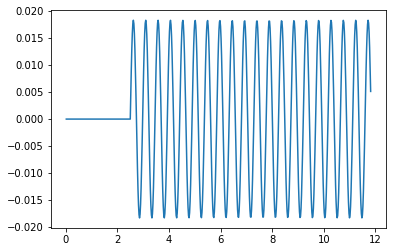

In [73]:
plt.plot(data['Time'],data['Heave'])

We can see a 'warm-up period' (2.5 s) at the beguinning of the simulation, which we will need to discard. We are only interested in the steady-state behaviour of the flow, so we also need to discard some time after the start of the motion. We can look at the lift and moment time series to see when is the flow stabilised.

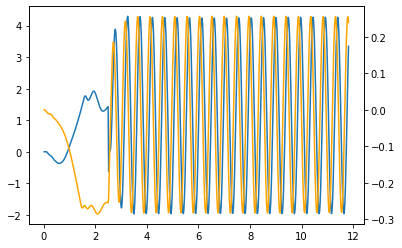

In [74]:
plt.plot(data['Time'],data['Lift'])
ax_2 = plt.twinx()
ax_2.plot(data['Time'],data['Moment'], color='orange')

It can be seen that the flow is fairly stabilised 1-1.5 seconds after the motion start. Thus, we will discard the first 4 seconds of data.

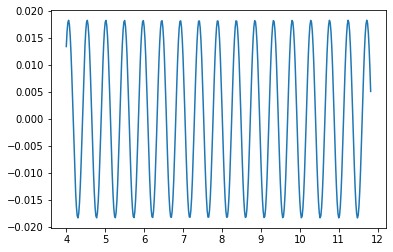

In [75]:
data = data[data['Time']>=4]
plt.plot(data['Time'],data['Heave'])

There is only one more thing left. For the formulas descrived before to be valid, the assumption of a sinusoidal imposed motion with no phase was taken. Thus, we must adapt the time domain so the heave time series fulfill this condition.

In order to find the current phase angle, we can fit a sinusoidal function into the heave time series. We will start defining the function to fit. It is important to note that the frequency is a given value. We can get it from the file name.

In [76]:
freq = 2.09
omega = freq*2*np.pi

def sin_func(t, A, phi):
    # t represents the time domain (multiple values)
    # A and phi are the searched amplitude and phase angle respectively
    return A*np.sin(t*omega+phi)

Now we can fit the function into the time series and extract its parameters. 

In [82]:
from scipy.optimize import curve_fit

# parameters, covariance = curve_fit(function, xdata, ydata, bounds=(lower_bounds, upper_bounds))
params, cov = curve_fit(sin_func, data['Time'], data['Heave'], bounds=([0,-np.pi], [np.inf, np.pi]))

params

array([1.82950091e-02, 4.10506001e-05])

The array's first value represents the amplitude and the second the phase angle. We can then calculate the time lag and shift the 'Time' time series.

In [80]:
A = params[0]
phi = params[1]

time_lag = phi/omega

data.loc[:,'Time'] += time_lag

Note that, if we fit again the sinusoidal function, the phase should be zero and the amplitude should be the same as before.

In [89]:
params, cov = curve_fit(sin_func, data['Time'], data['Heave'], bounds=([0,-np.pi], [np.inf, np.pi]))

new_A = params[0]
new_phi = params[1]

print('New amplitude: '+str(new_A))
print('New phase angle: '+str(new_phi))

New amplitude: 0.01829500911230178
New phase angle: 4.1050600081285106e-05


Now the data is prepared to be applied in the formulas explained during the theoretical review. It is of vital importance that the force and motion time series do not shift respect to each other. If that happens, the derivatives wouldn be correctly calculated with the mentioned formulas. Note that, during the last steps we have never shifted the motion or the force. We have cropped the time series and shifted the time domain (equivalent to set a new reference time), but the motion and the force are still synchronised.